<a href="https://colab.research.google.com/github/danglive/ATP-Tennis-prediction/blob/master/starter_kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import numpy as np
import re
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [0]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [0]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Exploratory Data Analysis

## Part 1: Answer the questions





Firstly, we will respond to some question:

Quick exploration of the 'Date' variable

In [0]:
df_atp['Date'].describe()

count                   52298
unique                   4650
top       2000-08-28 00:00:00
freq                      127
first     2000-01-03 00:00:00
last      2018-11-18 00:00:00
Name: Date, dtype: object

Looking at the tail of the dataset

In [0]:
df_atp.tail(3)

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
52295,67,1.38,3.14,NaN,NaN,1.36,3.20,3,NaN,NaN,Completed,Indoor,2018-11-17,1.42,3.2,NaN,NaN,NaN,NaN,5.0,6,NaN,NaN,NaN,NaN,NaN,6020.0,3,London,Federer R.,0,1.45,3.40,1.41,3.24,Semifinals,NaN,NaN,NaN,NaN,Masters Cup,Hard,Masters Cup,NaN,NaN,7.0,7,NaN,NaN,NaN,5085.0,5,Zverev A.,2.0
52296,67,6.52,1.12,NaN,NaN,7.00,1.11,3,NaN,NaN,Completed,Indoor,2018-11-17,7.00,1.14,NaN,NaN,NaN,NaN,2.0,2,NaN,NaN,NaN,NaN,NaN,4310.0,6,London,Anderson K.,0,7.72,1.15,7.72,1.12,Semifinals,NaN,NaN,NaN,NaN,Masters Cup,Hard,Masters Cup,NaN,NaN,6.0,6,NaN,NaN,NaN,8045.0,1,Djokovic N.,2.0
52297,67,1.15,5.69,NaN,NaN,1.14,5.50,3,NaN,NaN,Completed,Indoor,2018-11-18,1.17,6,NaN,NaN,NaN,NaN,4.0,3,NaN,NaN,NaN,NaN,NaN,8045.0,1,London,Djokovic N.,0,1.22,6.36,1.16,6.36,The Final,NaN,NaN,NaN,NaN,Masters Cup,Hard,Masters Cup,NaN,NaN,6.0,6,NaN,NaN,NaN,5085.0,5,Zverev A.,2.0


**1.   Three ATP players with the most wins:**

In [0]:
# List of the ATP players
Winners= df_atp.groupby("Winner").size()
ThreeWinners = Winners.sort_values(ascending=False).head(3)
print('Three ATP players with the most wins:', ThreeWinners)

Three ATP players with the most wins: Winner
Federer R.     1121
Nadal R.        891
Djokovic N.     802
dtype: int64


**2. Number of sets did the player “ Federer R.” win in total**

In [0]:
# Find the won set number in winner match 
df_Win_Match   = df_atp[df_atp["Winner"].str.contains('federer', case=False)]
Wset_in_Win    = df_Win_Match["Wsets"] 

# Find the won set number in loss match 
df_Loss_Match  = df_atp[df_atp["Loser"].str.contains('federer', case=False)]
Wset_in_Loss   = df_Loss_Match["Lsets"] 

# Convert Dataframe to numeric
Wset_in_Win    = pd.to_numeric(Wset_in_Win, errors='coerce')
Wset_in_Loss   = pd.to_numeric(Wset_in_Loss,errors='coerce')

# Total won set
Wset_total = int(Wset_in_Win.sum()+Wset_in_Loss.sum())
print('Number of set that Federer won in total:',Wset_total )

Number of set that Federer won in total: 2704


**3. Number of sets did the player “Federer R.” win during the years 2016 and 2017**

In [0]:
# winner set in 2016
Wsets_Win_2016  = df_Win_Match[df_Win_Match["Date"].dt.year == 2016]["Wsets"].sum()
Wsets_Loss_2016 = df_Loss_Match[df_Loss_Match["Date"].dt.year == 2016]["Lsets"].sum()
Wsets_2016 = int(Wsets_Win_2016 )+int(Wsets_Loss_2016)

# winner set in 2017
Wsets_Win_2017  = df_Win_Match[df_Win_Match["Date"].dt.year == 2017]["Wsets"].sum()
Wsets_Loss_2017 = df_Loss_Match[df_Loss_Match["Date"].dt.year == 2017]["Lsets"].sum()
Wsets_2017 = int(Wsets_Win_2017 )+int(Wsets_Loss_2017)

# Winnet set during 2016-2017
Wsets_2026_to_2017 = Wsets_2016 + Wsets_2017
print('The number of sets that Federer won during 2016 and 2017 is:',Wsets_2026_to_2017 )


The number of sets that Federer won during 2016 and 2017 is: 182


**4. The percentage of victories of the winner for each match**

Percentage of victories: per = total of win game/toal of game:

In [0]:
# Re-sitting a subset win-loss of Dataframes
Columns = df_atp.columns
Cols_W2L = Columns[[bool(re.search(r"([WL][1-5])",i)) for i in Columns]]
df_atp_sub = df_atp.loc[:,Cols_W2L]
df_atp_sub = df_atp_sub.apply(pd.to_numeric, errors='coerce')
df_atp_sub.head(3)

,L1,L2,L3,L4,L5,W1,W2,W3,W4,W5
0,4.0,2.0,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN
1,3.0,3.0,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN
2,7.0,5.0,3.0,NaN,NaN,6.0,7.0,6.0,NaN,NaN


In [0]:
# Function for calculate the percentage of a player's wins
def WinPercentage(obs):
    """
    Calculate the percentage of a player's wins
    #Arguments: observation 
    Return: Percentage of victories of the winner
    
    """ 
    myobs = obs.copy()
    myobs[myobs == ' '] = np.nan
    wins = np.nansum(myobs['W1':'W5'])
    loses = np.nansum(myobs['L1':'L5'])
    if wins+loses == 0:
        return(0)
    else:
        per = 100*wins/(wins+loses)
        return(per)

In [0]:
df_win_per = df_atp_sub.apply(axis=1, func=WinPercentage)
df_win_per = pd.DataFrame({'Wper':df_win_per})
df_win_per.describe(include='all')

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Wper
count,52298.000000
mean,61.600304
std,9.661224
min,0.000000
25%,56.000000
50%,60.000000
75%,66.666667
max,100.000000


In [0]:
print('The percentage of victories for a winner in the past is equal in average to about', df_win_per['Wper'].mean(),'%')

The percentage of victories for a winner in the past is equal in average to about 61.60030397913736 %


Histograms and Density Visualization

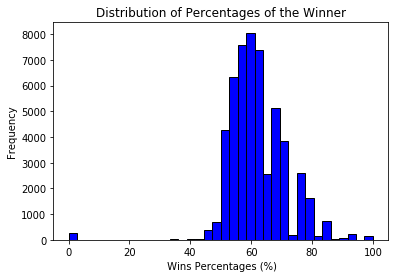

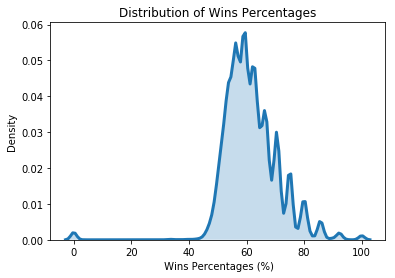

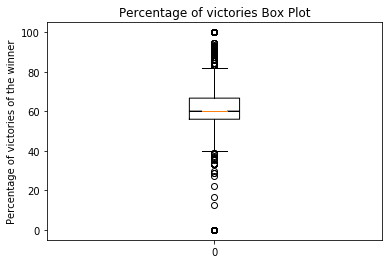

In [0]:
# Import the libraries
import matplotlib.pyplot as plt
# matplotlib histogram
plt.figure()
plt.hist(df_win_per["Wper"], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.xlabel(' Wins Percentages (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentages of the Winner')
plt.show()
import seaborn as sns
plt.figure()
sns.distplot(df_win_per["Wper"], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel(' Wins Percentages (%)')
plt.ylabel('Density')
plt.title('Distribution of Wins Percentages')
plt.show()

plt.figure()
plt.boxplot(df_win_per["Wper"], positions=[0], notch=True)
plt.ylabel('Percentage of victories of the winner')
plt.title("Percentage of victories Box Plot")
plt.show()

The percentage of victories for a winner in the past is equal in average to about 62% which makes sense since its > 50%. We notice that match winners tend to have more prior wins then their opponent.

## Part 2: Prediction of ATP tennis game during the year 2017

In the second part, we use the Machine Learning to predict the outcome for each ATP tennis game during the year 2017. To do this, we follow the steps:

1-- Data preparation and extraction

2-- Modeling

3-- Evaluation the model and choose the best model.

In [0]:
df_atp.head(2)

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,77,Adelaide,Ljubicic I.,0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,63,Dosedel S.,2.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,56,Adelaide,Clement A.,0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,6.0,6,NaN,NaN,NaN,NaN,5,Enqvist T.,2.0


**1. Data preparation and feature engineering**

In [0]:
df_atp.describe(include='all')

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
count,52298.000000,22745.000000,22745.000000,1097.000000,1097.000000,43666.000000,43643.000000,52298.000000,17506.000000,17506.000000,52298,52298,52298,39416.000000,39411.00,5055.000000,5055.000000,13358.000000,13358.000000,52037.000000,51527.0,24168.0,4731.000000,1791.000000,28142.000000,28131.000000,36035.000000,52220.0,52298,52298,52073.0,22745.000000,22745.000000,37339.000000,37339.000000,52298,5424.000000,5424.000000,15579.000000,15572.000000,52298,52298,52298,10671.000000,10671.000000,52035.000000,51526.0,24169.0,4731.000000,1791.000000,36094.000000,52283.0,52298,52074.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,4650,NaN,356.00,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,943.0,115,1483,4.0,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,8,4,214,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,604.0,948,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Completed,Outdoor,2000-08-28 00:00:00,NaN,1.35,NaN,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,NaN,NaN,NaN,46.0,Paris,Lopez F.,0.0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,US Open,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,1.0,Federer R.,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50358,42941,127,NaN,1321.00,NaN,NaN,NaN,NaN,NaN,12516.0,5412.0,NaN,NaN,NaN,NaN,NaN,464.0,3306,415,32647.0,NaN,NaN,NaN,NaN,24212,NaN,NaN,NaN,NaN,12204,27716,2413,NaN,NaN,NaN,33924.0,17187.0,NaN,NaN,NaN,1172.0,1121,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.222532,3.594448,1.834821,2.547347,1.728633,3.551805,1.823768,3.372366,3.000658,1.812080,NaN,NaN,NaN,3.262180,NaN,2.401363,1.738742,2.387132,1.671585,4.056229,NaN,NaN,3.863454,3.756002,3.451461,1.810226,1047.544665,NaN,NaN,NaN,NaN,8.326076,1.998610,4.186818,1.926742,NaN,2.672064,1.793035,3.557943,1.796538,NaN,NaN,NaN,3.542479,1.815867,5.794331,NaN,NaN,5.777003,6.637633,1831.891644,NaN,NaN,2.141760
std,18.115493,3.282610,1.107884,1.330386,0.730434,3.527564,1.100806,0.778516,2.032791,0.868254,NaN,NaN,NaN,2.449627,NaN,1.057305,0.614454,1.048818,0.585400,1.845206,NaN,NaN,1.895683,2.817183,3.075889,1.031691,1213.773168,NaN,NaN,NaN,NaN,397.235666,1.628982,5.581127,1.334797,NaN,1.424672,0.751026,3.272510,1.004273,NaN,NaN,NaN,3.646316,0.996238,1.239577,NaN,NaN,1.274712,2.290596,2294.307489,NaN,NaN,0.460311
min,1.000000,1.010000,1.010000,1.020000,1.010000,1.002000,1.000000,3.000000,1.020000,1.000000,NaN,NaN,NaN,1.000000,NaN,1.030000,1.010000,1.030000,1.010000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.010000,1.010000,1.010000,1.000000,NaN,0.000000,0.000000,1.010000,1.000000,NaN,NaN,NaN,1.020000,1.010000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,19.000000,1.740000,1.240000,1.600000,1.250000,1.720000,1.222000,3.000000,1.720000,1.280000,NaN,NaN,NaN,1.750000,NaN,1.655000,1.330000,1.650000,1.300000,3.000000,NaN,NaN,2.000000,2.000000,1.730000,1.250000,496.000000,NaN,NaN,NaN,NaN,1.850000,1.290000,1.794000,1.270000,NaN,1.670000,1.333000,1.730000,1.220000,NaN,NaN,NaN,1.750000,1.240000,6.000000,NaN,NaN,6.000000,6.000000,640.000000,NaN,NaN,2.000000


To predict the outcome of ATP game, we define the labels for the wins and the loses. 

Assuming that we set Player 1 as the player who's name alphabetically comes first.

Then, xe set the labels as:

+ 1 if Player 1 wins

+ 2 if Player 1 loses

In [0]:
df_atp["Labels"] = df_atp.apply(lambda row: 1 if row["Winner"] < row["Loser"] else 0, axis=1)
display(df_atp[["Winner", "Loser", "Labels"]].head(3))
print("--------------------------------")
print("We notice that there is no Imbalanced Data issue:")
print("The number of 1 is:", df_atp[df_atp["Labels"] == 1].shape[0])
print("The number of 0 is:", df_atp[df_atp["Labels"] == 0].shape[0])

,Winner,Loser,Labels
0,Dosedel S.,Ljubicic I.,1
1,Enqvist T.,Clement A.,0
2,Escude N.,Baccanello P.,0


--------------------------------
We notice that there is no Imbalanced Data issue:
The number of 1 is: 26602
The number of 0 is: 25696


Next, the dataset will be reformatted so that it can be integrated into a machine learning model.

In [0]:
# Firstly, we drop the features that are intuitively irrelevant
userNames = ['AvgL',	'AvgW'	'B&WL',	'B&WW',	'B365L', 'B365W', 'Best of', 'CBL',	'CBW',	'Comment',	'Court', 'Date',	
'EXL',	'EXW',	'GBL',	'GBW',	'IWL',	'IWW',	'L1',	'L2',	'L3',	'L4',	'L5',	'LBL',	'LBW',	'LPts',	'LRank',	 'Location',	 'Loser',	
'Lsets',	'MaxL',	'MaxW',	'PSL',	'PSW',	'Round',	'SBL',	'SBW',	'SJL',	'SJW',	'Series', 'Surface', 'Tournament',	
'UBL',	'UBW',	'W1',	'W2',	'W3',	'W4',	'W5',	'WPts',	'WRank', 'Winner',	'Wsets','Labels',]
feature = df_atp.loc[:,userNames]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Then, we convert values that are objects to float representation and the columns where the values are NaNs

In [0]:
# Convert values that are objects to float 
objects = feature.columns[feature.dtypes.eq(object)]
feature.loc[:, objects] = feature.apply(pd.to_numeric, errors='coerce')
# Convert date time to float
feature["Date"] = pd.to_numeric(feature["Date"], downcast='float')
feature.describe(include='all')


,AvgL,AvgWB&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets,Labels
count,22745.000000,0.0,1097.000000,43666.000000,43643.000000,52298.000000,17506.000000,17506.000000,0.0,0.0,5.229800e+04,39416.000000,39410.000000,5055.000000,5055.000000,13358.000000,13358.000000,52037.000000,51525.000000,24070.000000,4731.000000,1791.000000,28142.000000,28131.000000,36035.000000,52193.000000,0.0,0.0,52072.000000,22745.000000,22745.000000,37339.000000,37339.000000,0.0,5424.000000,5424.000000,15579.000000,15572.000000,0.0,0.0,0.0,10671.000000,10671.000000,52035.000000,51524.000000,24070.000000,4731.000000,1791.000000,36094.000000,52282.000000,0.0,52074.000000,52298.000000
mean,3.594448,NaN,1.728633,3.551805,1.823768,3.372366,3.000658,1.812080,NaN,NaN,1.236536e+18,3.262180,1.802489,2.401363,1.738742,2.387132,1.671585,4.056229,3.872664,3.607104,3.863454,3.756002,3.451461,1.810226,1047.544665,92.227042,NaN,NaN,0.407801,8.326076,1.998610,4.186818,1.926742,NaN,2.672064,1.793035,3.557943,1.796538,NaN,NaN,NaN,3.542479,1.815867,5.794331,5.772824,6.025052,5.777003,6.637633,1831.891644,59.172564,NaN,2.141760,0.508662
std,3.282610,NaN,0.730434,3.527564,1.100806,0.778516,2.032791,0.868254,NaN,NaN,1.733248e+17,2.449627,0.959042,1.057305,0.614454,1.048818,0.585400,1.845206,1.874537,1.767365,1.895683,2.817183,3.075889,1.031691,1213.773168,116.947845,NaN,NaN,0.557696,397.235666,1.628982,5.581127,1.334797,NaN,1.424672,0.751026,3.272510,1.004273,NaN,NaN,NaN,3.646316,0.996238,1.239577,1.256545,0.932111,1.274712,2.290596,2294.307489,73.614866,NaN,0.460311,0.499930
min,1.010000,NaN,1.010000,1.002000,1.000000,3.000000,1.020000,1.000000,NaN,NaN,9.468576e+17,1.000000,0.000000,1.030000,1.010000,1.030000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,1.010000,1.010000,1.010000,1.000000,NaN,0.000000,0.000000,1.010000,1.000000,NaN,NaN,NaN,1.020000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,1.740000,NaN,1.250000,1.720000,1.222000,3.000000,1.720000,1.280000,NaN,NaN,1.086826e+18,1.750000,1.250000,1.655000,1.330000,1.650000,1.300000,3.000000,2.000000,2.000000,2.000000,2.000000,1.730000,1.250000,496.000000,35.000000,NaN,NaN,0.000000,1.850000,1.290000,1.794000,1.270000,NaN,1.670000,1.333000,1.730000,1.220000,NaN,NaN,NaN,1.750000,1.240000,6.000000,6.000000,6.000000,6.000000,6.000000,640.000000,17.000000,NaN,2.000000,0.000000
50%,2.550000,NaN,1.500000,2.500000,1.500000,3.000000,2.375000,1.550000,NaN,NaN,1.233619e+18,2.460000,1.500000,2.100000,1.550000,2.100000,1.500000,4.000000,4.000000,4.000000,4.000000,3.000000,2.500000,1.500000,736.000000,65.000000,NaN,NaN,0.000000,2.780000,1.570000,2.660000,1.550000,NaN,2.250000,1.571000,2.630000,1.500000,NaN,NaN,NaN,2.500000,1.500000,6.000000,6.000000,6.000000,6.000000,6.000000,1007.000000,41.000000,NaN,2.000000,1.000000
75%,3.990000,NaN,1.950000,4.000000,2.075000,3.000000,3.400000,2.050000,NaN,NaN,1.388534e+18,3.750000,2.050000,2.800000,1.980000,2.900000,1.850000,6.000000,6.000000,5.000000,6.000000,5.000000,4.000000,2.000000,1141.000000,105.000000,NaN,NaN,1.000000,4.540000,2.200000,4.240000,2.140000,NaN,3.000000,2.100000,4.000000,2.000000,NaN,NaN,NaN,3.850000,2.030000,6.000000,6.000000,6.000000,6.000000,7.000000,1895.000000,77.000000,NaN,2.000000,1.000000
max,36.440000,NaN,7.500000,101.000000,29.000000,5.000000,25.000000,14.000000,NaN,NaN,1.542499e+18,40.000000,20.000000,11.000000,7.500000,10.000000,6.000000,7.000000,7.000000,7.000000,7.000000,68.000000,51.000000,26.000000,16950.000000,2159.000000,NaN,NaN,2.000000,42586.000000,76.000000,121.000000,46.000000,NaN,13.000000,9.000000,81.000000,19.000000,NaN,NaN,NaN,60.000000,18.000000,7.000000,7.000000,7.000000,7.000000,70.000000,16950.000000,1890.000000,NaN,3.000000,1.000000


We observe the data missing. It can be seen with data.describe () that most of the variables have a signigicative proportion of missing values. To analyze in more detail the behavior of missing values, plot a heatmap graph showing the percentage of missing value.

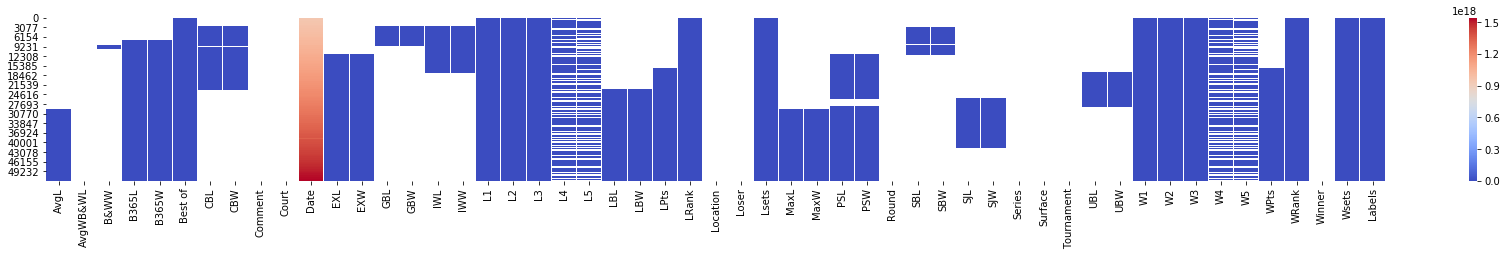

In [0]:
fig, ax = plt.subplots(figsize=(30,3))
sns.heatmap(feature,cmap='coolwarm')
plt.show()

For example, we try to calculate the percentage and number of missing values in WPts and LPts column as follows:

In [0]:
print('Percentage of missing values in WPts column', (len(feature.WPts) - len(feature.dropna()))/len(feature.WPts)*100)
print('Percentage of missing values in LPts column', (len(feature.WPts) - len(feature.dropna()))/len(feature.LPts)*100)

Percentage of missing values in WPts column 100.0
Percentage of missing values in LPts column 100.0


Now, we will drop the features that are intuitively irrelevant. We start do an imputation of missing values. In fact there are many approaches to accomplish this. To simplify, we fill "nan" values with the following strategy:

+ For odds, we replace "nan" by a value of 1.0 which corresponds to a winning probability of 50% (For an odd X/Y, the winning probability is given by: p = Y/(X + Y)
+ For number of games won by set, we replace "nan" by zeros, supposing that the match is won before arriving to this set
+ For Winner and Loser, we replace by zeros
+ For number of sets won during the match `Wsets` and `Lsets`, we suppose that the "nan" values correspond to a withdrawal (e.g. due to injury), so we replace that by zeros
+ For Player's rank, we fill with the maximum rank value in each column


In [0]:
df_tmp = feature.copy()
df_tmp["Winner"]= 0
df_tmp["Loser"]= 0
df_tmp = df_tmp.dropna(axis=1, how="all")
df_tmp.fillna({x : 1.0 for x in ["AvgL", "AvgW", "B&WL", "B&WW", "B365L", "B365W", "CBL", "CBW", "EXL", "EXW", "GBL", "GBW", "IWL", "IWW",
                                 "LBL", "LBW", "MaxL", "MaxW", "PSL", "PSW", "SBL", "SBW", "SJL", "SJW", "UBL", "UBW","WPts", "LPts"]}, inplace=True)

df_tmp.fillna({x : 0 for x in ["L1", "L2", "L3", "L4", "L5", "W1", "W2", "W3", "W4", "W5", "Lsets", "Wsets","Best of"]}, inplace=True);
df_tmp["WRank"] = df_tmp["WRank"].fillna(df_tmp["WRank"].max())
df_tmp["LRank"] = df_tmp["LRank"].fillna(df_tmp["LRank"].max())

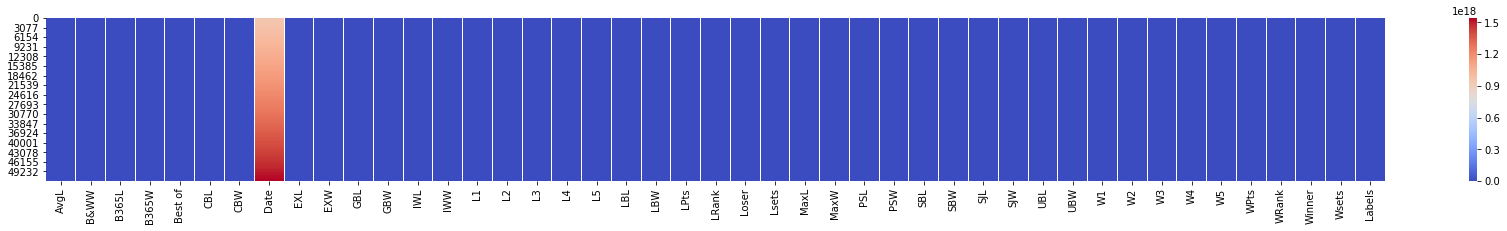

In [0]:
fig, ax = plt.subplots(figsize=(30,3))
sns.heatmap(df_tmp,cmap='coolwarm')
plt.show()

Number of missing values is filled in all columns

Now, we use a Random Forest Classifier to find the features relevance.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


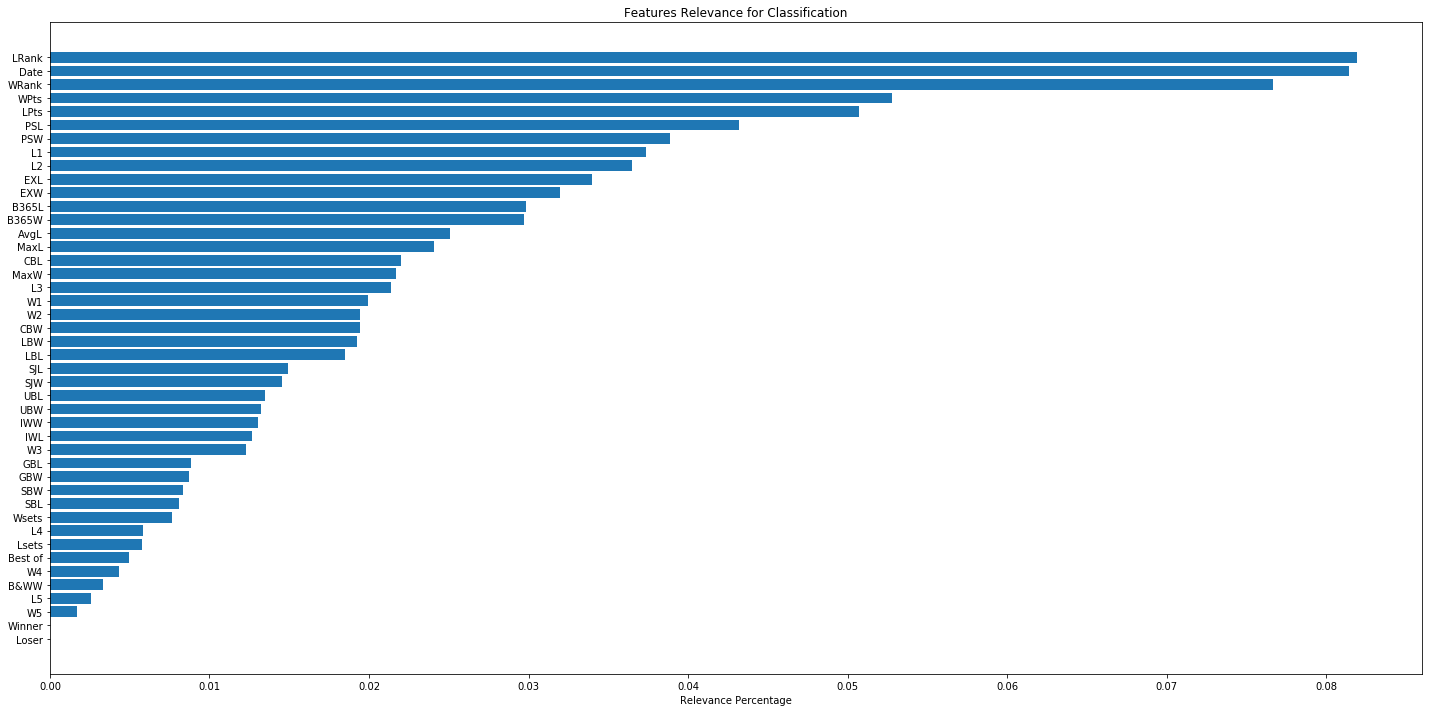

In [0]:
# Import RandomForestClassifier from library sklearn
from sklearn.ensemble import RandomForestClassifier
df_forest = RandomForestClassifier(n_jobs=-1)
df_forest.fit(X=df_tmp.drop("Labels", axis=1), y=df_tmp.loc[:, "Labels"])

plt.figure(figsize=(20, 10))
df_imp = df_forest.feature_importances_
cols = df_tmp.columns

df_imp, cols = zip(*sorted(zip(df_imp, cols)))

plt.barh(range(len(cols)), df_imp, align="center");
plt.yticks(range(len(cols)), cols)
plt.title("Features Relevance for Classification")
plt.xlabel("Relevance Percentage")
plt.tight_layout();
plt.show()

We set a minimum relevance percentage threshold according to which we drop features

In [0]:
relevance_threshold = 0.03
df_imp = np.array(df_imp)
df_relevante = cols[- np.where(df_imp > relevance_threshold)[0].shape[0] :]
df_relevante

('EXW',
 'EXL',
 'L2',
 'L1',
 'PSW',
 'PSL',
 'LPts',
 'WPts',
 'WRank',
 'Date',
 'LRank')

In [0]:
df_tmp = df_tmp[[*(df_relevante + ("Loser","Winner","Labels",))]]
df_tmp.head(4)

,EXW,EXL,L2,L1,PSW,PSL,LPts,WPts,WRank,Date,LRank,Loser,Winner,Labels
0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,63.0,9.468576e+17,77.0,0,0,1
1,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,5.0,9.468576e+17,56.0,0,0,0
2,1.0,1.0,5.0,7.0,1.0,1.0,1.0,1.0,40.0,9.468576e+17,655.0,0,0,0
3,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,65.0,9.468576e+17,87.0,0,0,1


Opponents ATP Ranking Distribution

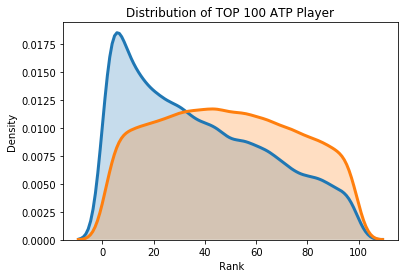

In [0]:
plt.figure()
sns.distplot(df_tmp[df_tmp["WRank"]<100]["WRank"], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df_tmp[df_tmp["LRank"]<100]["LRank"], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel(' Rank')
plt.ylabel('Density')
plt.title('Distribution of TOP 100 ATP Player')
plt.show()


**2. Modeling**

In [0]:
#Preparing datas for splitting (Train-Test)
test_year = 2017
df_train = df_tmp.iloc[df_atp[df_atp["Date"].dt.year != test_year].index]
df_test  = df_tmp.iloc[df_atp[df_atp["Date"].dt.year == test_year].index]


In [0]:
#Splitting label of input and output (Train - Test)
X_train = df_train.drop(["Labels"], axis=1)
y_train = df_train["Labels"]

X_test = df_test.drop(["Labels"], axis=1)
y_test = df_test["Labels"]

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

In [0]:
names = ['Linear Regression',"Nearest Neighbors", "Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5, n_jobs=-1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1),
    AdaBoostClassifier(),
    GaussianNB()
]

y_pred = []
train_time = []

for name, clf in zip(names, classifiers):
    tic = time()
    clf.fit(X_train, y_train)
    toc = time()
    
    y_pred.append(clf.predict(X_train))
    train_time.append(toc - tic)
    
    print("Classifier : {} ===> Training duration : {} sec".format(name, train_time[-1]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifier : Linear Regression ===> Training duration : 0.05212593078613281 sec
Classifier : Nearest Neighbors ===> Training duration : 0.6061506271362305 sec
Classifier : Decision Tree ===> Training duration : 0.270449161529541 sec
Classifier : Random Forest ===> Training duration : 0.41184115409851074 sec
Classifier : AdaBoost ===> Training duration : 2.1305809020996094 sec
Classifier : Naive Bayes ===> Training duration : 0.014626741409301758 sec


**1.Evaluation the model and choose the best model.**

In [0]:
def find_best_algorithms(y_true, y_pred, name_classifiers, train_time=None):
    """
    Displays multiple evaluation metrics for each classifier
    """
    assert(len(y_pred) == len(name_classifiers))
    assert(len(train_time) == len(name_classifiers) if train_time else True)
    
    reports = []
    metrics = ["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"]
    if train_time:
        metrics = metrics + ["Training Duration (seconds)"]

    for idx, y_clf in enumerate(y_pred):
        acc = accuracy_score(y_true, y_clf)
        pre = precision_score(y_true, y_clf)
        rec = recall_score(y_true, y_clf)
        f1s = f1_score(y_true, y_clf)
        report = (name_classifiers[idx], acc, pre, rec, f1s)
        if train_time:
            report = report + (train_time[idx], )
        reports.append(report)
            
    display(pd.DataFrame.from_records(reports, columns=metrics))

In [0]:
find_best_algorithms(y_train, y_pred, names, train_time)

,Classifier,Accuracy,Precision,Recall,F1-Score,Training Duration (seconds)
0,Linear Regression,0.508366,0.508366,1.000000,0.674062,0.052126
1,Nearest Neighbors,0.689266,0.692897,0.698222,0.695549,0.606151
2,Decision Tree,0.577573,0.573218,0.661742,0.614307,0.270449
3,Random Forest,0.618992,0.611580,0.686577,0.646912,0.411841
4,AdaBoost,0.535550,0.542067,0.556581,0.549228,2.130581
5,Naive Bayes,0.508366,0.508366,1.000000,0.674062,0.014627


By taking as metric the F1-score to have a compromise between precision and recall,  we can see that kNN seems to perform the best out of all the algorithms.

In [0]:
y_test_pred = []

for name, clf in zip(names, classifiers):
    y_test_pred.append(clf.predict(X_test))
find_best_algorithms(y_test, y_test_pred, names)

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Linear Regression,0.514231,0.514231,1.000000,0.679198
1,Nearest Neighbors,0.485769,0.500000,0.499631,0.499815
2,Decision Tree,0.515370,0.530757,0.496679,0.513153
3,Random Forest,0.525617,0.542510,0.494465,0.517375
4,AdaBoost,0.532448,0.552972,0.473801,0.510334
5,Naive Bayes,0.514231,0.514231,1.000000,0.679198


However, the accuracy on test data of KNN is about 48.57 %

Hyperparameter Tuning

For now, however, we will use kNN. Let's first try and tune a kNN with cross validation. To do this, we will use grid search. Grid search essentially tries out each combination of values and finds the model with the lowest error metric.

In [0]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.50845581 0.49360717 0.46657269 0.48721305 0.49244865]
cv_scores mean:0.4896594740478314


Using cross-validation, our mean score is about 48.96%

In [0]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 7}

We can see that 7 is the optimal value for "n_neighbors". We can use the "best_score_" function to check the accuracy of our model when "n_neighbors" is 7. "best_score_" outputs the mean accuracy of the scores obtained through cross-validation.

In [0]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.48974085335158973

Using grid search, our mean score is about 48.97%

By using grid search, the accuracy of model is improved more than. 

## Discussion

We conducted a building of model on the ATP match dataset from 2000 to 2016 and predict to 2017. Some points need improvement such as: 
+ Improve data validation / cleansing to improve the accuracy of our model
+ Propose th different options for an imputation of missing data. 
+ Propose an other ways for hyper-parameters tuning (e.g. by splitting the dataset to train/validation/test)
+ Try to build the model of prediction by other approach as: Linear-SVM, Kernel SVM or Neural Network,...